# Importing Libraries

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [185]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

# Visualization


Survived
0    549
1    342
Name: count, dtype: int64


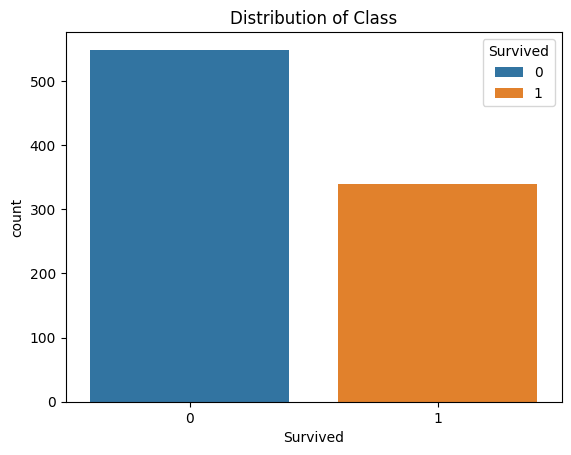

In [188]:
print(df["Survived"].value_counts())

sns.countplot(x='Survived', data=test, hue='Survived', legend=True)
plt.title('Distribution of Class')
plt.show()

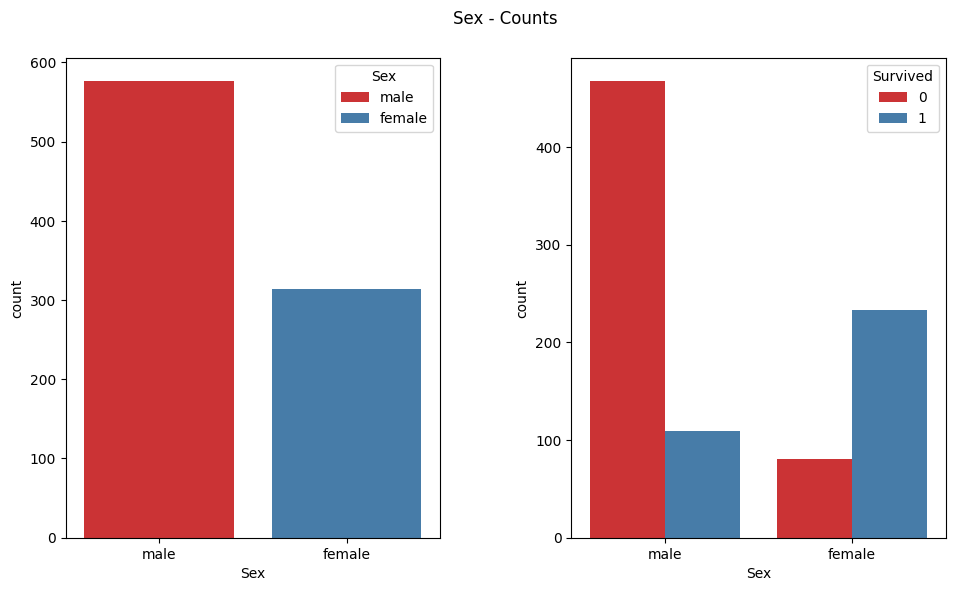

In [189]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("Sex - Counts")
fig.add_subplot(121)
sns.countplot(x = df['Sex'], hue = df["Sex"], palette = "Set1", legend = True)
fig.add_subplot(122)
sns.countplot(x = df['Sex'], hue = df["Survived"], palette = "Set1")
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()

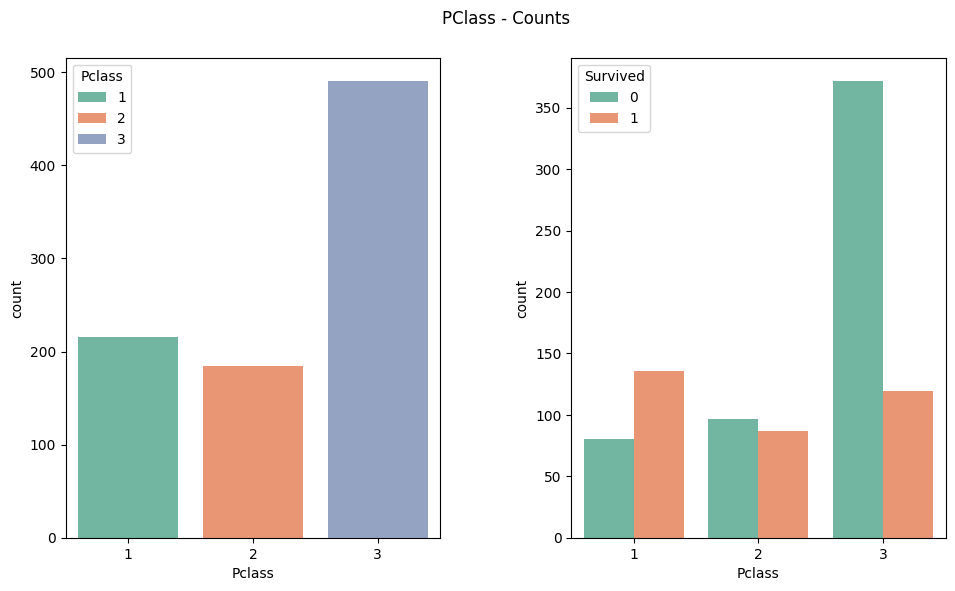

In [190]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("PClass - Counts")
fig.add_subplot(121)
sns.countplot(x = df['Pclass'], hue = df["Pclass"], palette = "Set2", legend = True)
fig.add_subplot(122)
sns.countplot(x = df['Pclass'], hue = df["Survived"], palette = "Set2")
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()

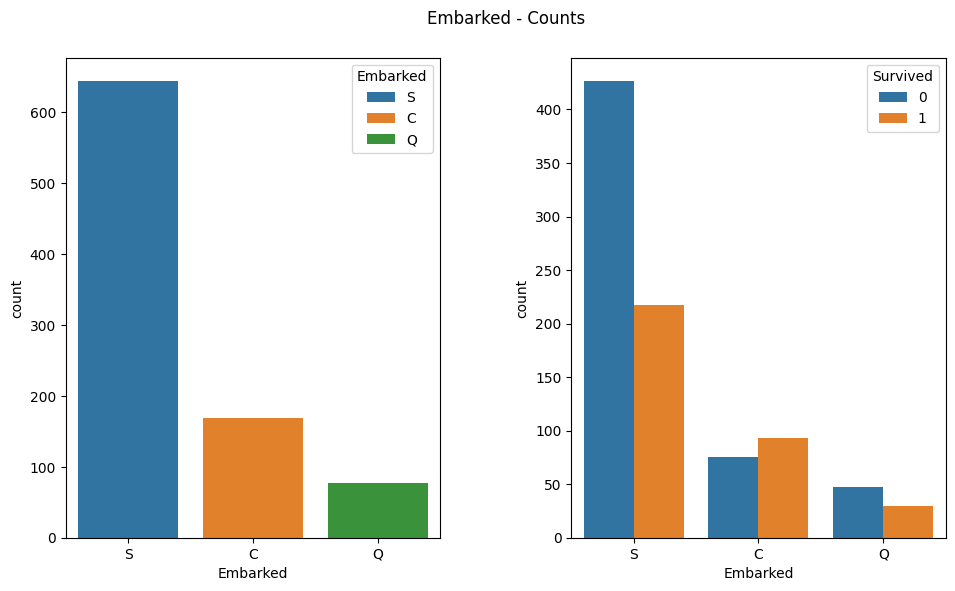

In [191]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("Embarked - Counts")
fig.add_subplot(121)
sns.countplot(x = df['Embarked'], hue = df["Embarked"], legend = True)
fig.add_subplot(122)
sns.countplot(x = df['Embarked'], hue = df["Survived"])
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()

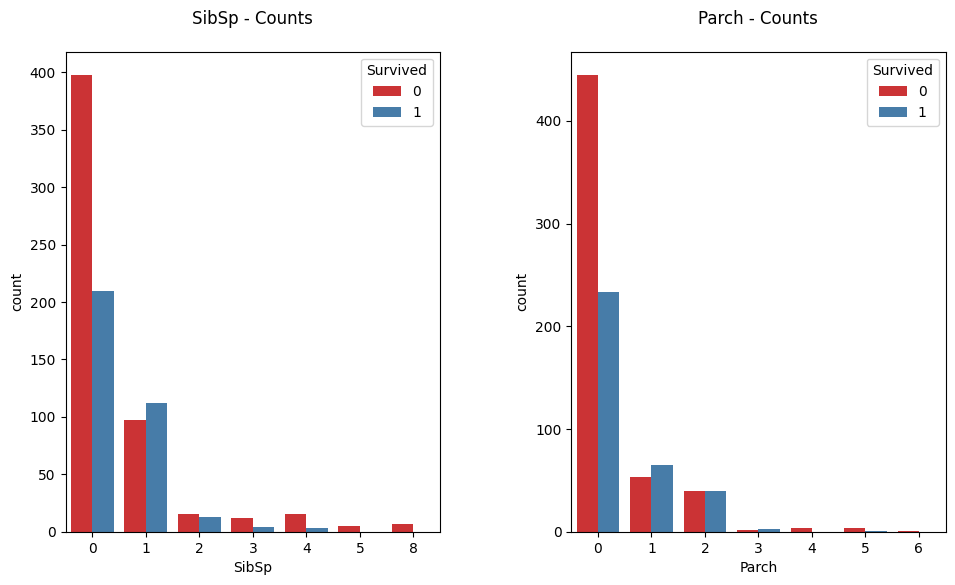

In [192]:
fig = plt.figure(figsize=(11,6))
#fig.suptitle("Embarked - Counts")
fig.add_subplot(121)
sns.countplot(x = df['SibSp'], hue = df["Survived"], palette = "Set1" )
plt.title("SibSp - Counts", pad = 20)
fig.add_subplot(122)
sns.countplot(x = df['Parch'], hue = df["Survived"], palette = "Set1")
plt.title("Parch - Counts", pad = 20)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.5)
plt.show()

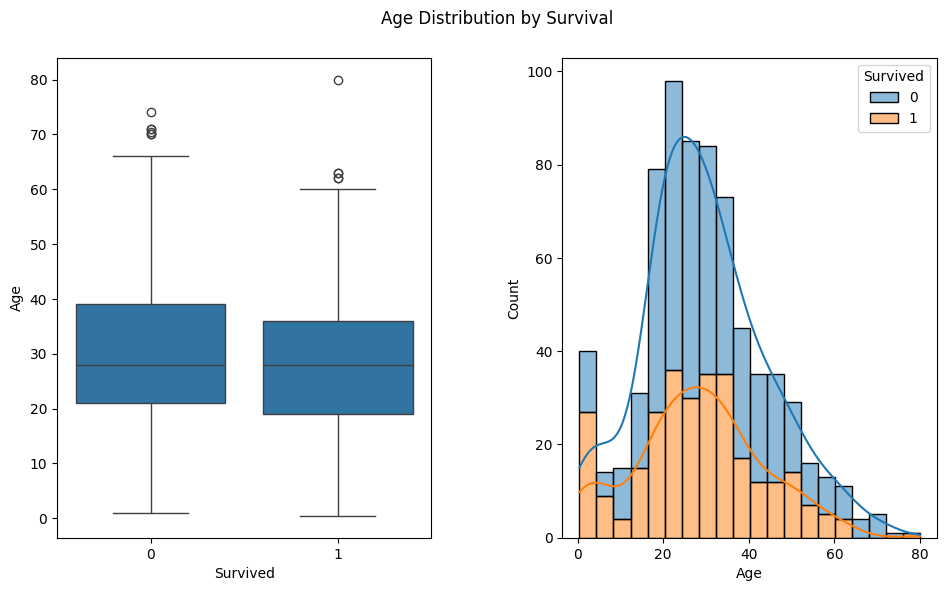

In [196]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("Age Distribution by Survival")
fig.add_subplot(121)
sns.boxplot(x=df['Survived'], y=df['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
fig.add_subplot(122)
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()


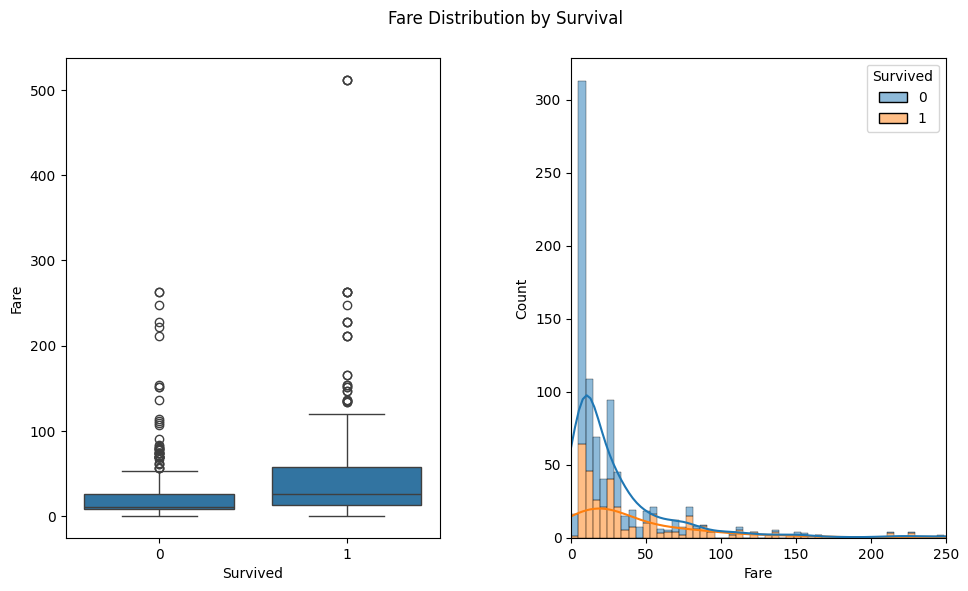

In [197]:
fig = plt.figure(figsize=(11,6))
fig.suptitle("Fare Distribution by Survival")
fig.add_subplot(121)
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
fig.add_subplot(122)
sns.histplot(data=df, x="Fare", hue="Survived", multiple="stack", kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0,250)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()


# Handling Missing rows

In [198]:
# Handle missing values
# Filling Null Ages with Mean of the Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

In [199]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

### There are no Null values, hence good to proceed

# Label Encoding Categorical Features

In [200]:
# Prepare data for training
test = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print("Dataset before Label encoding\n")
test


Dataset before Label encoding



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,29.699118,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


In [201]:
# Label encode categorical features
label_encoder = LabelEncoder()
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
print("\nDataset after Label encoding\n")
test


Dataset after Label encoding



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,2,0
1,1,0,38.000000,1,0,71.2833,0,1
2,3,0,26.000000,0,0,7.9250,2,1
3,1,0,35.000000,1,0,53.1000,2,1
4,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,0
887,1,0,19.000000,0,0,30.0000,2,1
888,3,0,29.699118,1,2,23.4500,2,0
889,1,1,26.000000,0,0,30.0000,0,1


# Separating Features and Target

In [202]:
# Split data into features and target
x = test.drop('Survived', axis=1)
y = test['Survived']
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# Model - Random Forest Classifier

In [203]:
# Initialize and train Random Forest Classifier
model_random = RandomForestClassifier()
model_random.fit(X_train, Y_train)

RandomForestClassifier()

# Accuracies

In [204]:
# Print training and test accuracy
print(f"Training Accuracy : {model_random.score(X_train, Y_train)}")
print(f"Test Accuracy : {model_random.score(x_test, y_test)}")


Training Accuracy : 0.9831223628691983
Test Accuracy : 0.8089887640449438


# User Input Prediction

In [205]:
def predict_survival(row):
    """
    Predict the survival of a passenger given their details.

    Parameters:
    row (pd.Series): A row of the DataFrame containing the details of the passenger.

    Returns:
    int: Predicted survival (1 for survived, 0 for did not survive).
    """
    
    data_df = pd.DataFrame([row])
    
    data_df['Age'].fillna(df['Age'].mean(), inplace=True)
    
    data_df['Sex'] = data_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    
    data_df['Embarked'] = data_df['Embarked'].apply(lambda x: 0 if x == 'C' else 1 if x == 'Q' else 2)
    
    print("Predicting survival...")
    prediction = model_random.predict(data_df)
    
    return prediction[0]

# Input from user
input_str = input('Enter the new data for prediction (tab-separated values): ')
input_values = input_str.split('\t')

# Assuming the input is ordered as follows: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
if len(input_values) != 11:
    print(len(input_values))
    print(input_values)
    print("Error: Expected 11 values, but got a different number of values.")
else:
    
    input_values = [None if val == '' else val for val in input_values]
    print(f"Processed input values: {input_values}")
    
    # Extract the relevant columns
    input_dict = {
        'Pclass': input_values[1],
        'Sex': input_values[3],
        'Age': float(input_values[4]) if input_values[4] is not None else None,
        'SibSp': int(input_values[5]),
        'Parch': int(input_values[6]),
        'Fare': float(input_values[8]),
        'Embarked': input_values[10]
    }
    
    print(f"Converted input to dictionary: {input_dict}")
    
    # Convert to Series
    input_series = pd.Series(input_dict)
    
    
    prediction = predict_survival(input_series)
    
    if prediction == 1:
        print()
        print(f"Predicted Class: {prediction}")
        print('The passenger survived')
    else:
        print()
        print(f"Predicted Class: {prediction}")
        print('The passenger did not survive')

Enter the new data for prediction (tab-separated values):  7	1	McCarthy, Mr. Timothy J	male	54	0	0	17463	51.8625	E46	S


Processed input values: ['7', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
Converted input to dictionary: {'Pclass': '1', 'Sex': 'male', 'Age': 54.0, 'SibSp': 0, 'Parch': 0, 'Fare': 51.8625, 'Embarked': 'S'}
Predicting survival...

Predicted Class: 0
The passenger did not survive
